<a href="https://colab.research.google.com/github/Mangalis0/regression_team_2/blob/master/Faatimah_'fresh'_notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1Tkiy1Gvc4Ce0L3qiHKUAvkttcWkGMU8O)

                                                                      Image source: https://vc4a.com/ventures/sendy-limited/





# **Sendy Explore Competition - Regression Analysis**

____

Team 2 - Mangaliso Samuel Makhoba, Bryan Green, Michael Ilic, Lawrence Hlapa, Faatimah Mansoor 

**The structure of this notebook is as follows:**

[**1 Introduction**](#Introduction)




[**2 Body**](#Body)

  [2.1 Import modules](#Import_modules)

  [2.2 Import dataset](#Import_dataset)

  [2.3 EDA](#EDA)
  
  [3.4 Data preprocessing](#Data_preprocessing)

  [2.5 Modelling](#Modelling)

  [2.6 Model selection](#Model_selection)

  [2.7 Using model on Test]

  [2.8 Functions to be placed in API]

[**3 Conclusion**](#Conclusion)

[**4 References and links**](#References_and_links)


##**1 Introduction**
<a id="Introduction"></a>

Sendy is a logistic company in Kenya. The aim of this project is to build a regression model for Sendy which can accurately predict delivery time, from the time a package is picked up to its arrival at the final destination.

To build this model, the Train dataset and the riders dataset will used. Regression models will be trained, and the most suitable will be selected. This model will then be used to predict delivery time for the test dataset 

**Variable to be predicted(y):** Time_from_Pickup_to_Arrival





##**2 Body**
<a id="Body"></a>

###2.1 Import modules
<a id="Import_modules"></a>

In [0]:
#import modules 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import math

from datetime import datetime

###2.2 Import dataset
<a id="Import_dataset"></a>

In [0]:
#if using google colab,run this cell to import data 
train = pd.read_csv('/content/Train.csv') #training set
test = pd.read_csv('/content/Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('/content/Riders.csv') #riders info
variable_def = pd.read_csv('/content/VariableDefinitions.csv')
sample = pd.read_csv('/content/SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

In [0]:
#if using jupyter notebook, run this cell to import data
train = pd.read_csv('Train.csv') #training set
test = pd.read_csv('Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('Riders.csv') #riders info
variable_def = pd.read_csv('VariableDefinitions.csv')
sample = pd.read_csv('SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

###2.3 EDA
<a id="EDA"></a>

**Variable** **definitions**

In [0]:
variable_def

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


**Riders EDA**

In [0]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [0]:
riders.isnull().sum(axis = 0) #number of nulls per column 

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

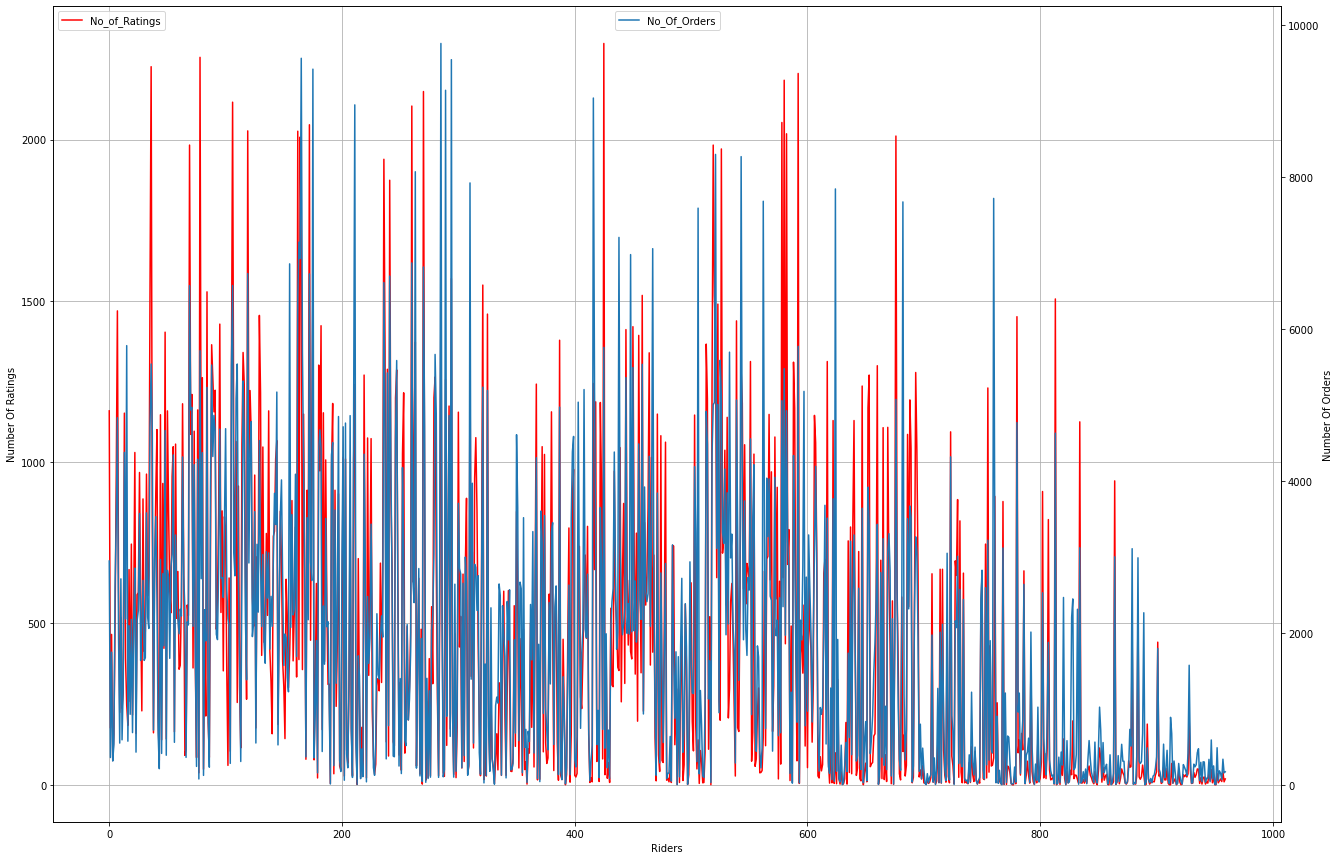

In [0]:
# Riders Number Of Ratings Vs Number Of Orders

from matplotlib import rc

rc('mathtext', default='regular')
# Create Empty figure
build = plt.figure(figsize=(22,15))

# Split Figure To Allow Two Sets Of Y Axes
axes1 = build.add_subplot(111)

# Plot The First Line On Its Axis
axes1.plot(np.arange(len(riders["No_of_Ratings"])), riders["No_of_Ratings"], '-', label = "No_of_Ratings", color='red')

# Create Second Y Axis And Plot Second Line
axes2 = axes1.twinx()
axes2.plot(np.arange(len(riders["No_Of_Orders"])), riders["No_Of_Orders"], '-', label = "No_Of_Orders")

# Add Legends For Each Axis
axes1.legend(loc=2)
axes2.legend(loc=9)

axes1.grid()

# Set Labels Of Axes
axes1.set_xlabel("Riders")
axes1.set_ylabel("Number Of Ratings")
axes2.set_ylabel("Number Of Orders")
plt.show()

**Train EDA**

In [0]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
print('train contains')
print('No. of rows:', train.shape[0])
print('No. of columns:', train.shape[1])

train contains
No. of rows: 21201
No. of columns: 29


In [0]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [0]:
train.isnull().sum(axis = 0) #number of nulls per column

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [0]:
def percentage_missing_values(input_df, column_name):

  missing_col_values = sum(input_df[column_name].isnull())

  per_col_missing = round(missing_col_values / len(input_df[column_name]) * 100, 2)

  return print(column_name, ":" ,per_col_missing, "percentage of the data is missing")

In [0]:
percentage_missing_values(train, "Temperature")

Temperature : 20.59 percentage of the data is missing


In [0]:
percentage_missing_values(train, "Precipitation in millimeters")

Precipitation in millimeters : 97.4 percentage of the data is missing


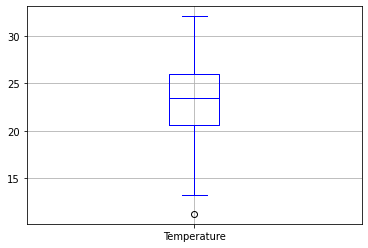

In [0]:
#understanding temperature data
train.boxplot(['Temperature'], color = 'blue')
plt.show()

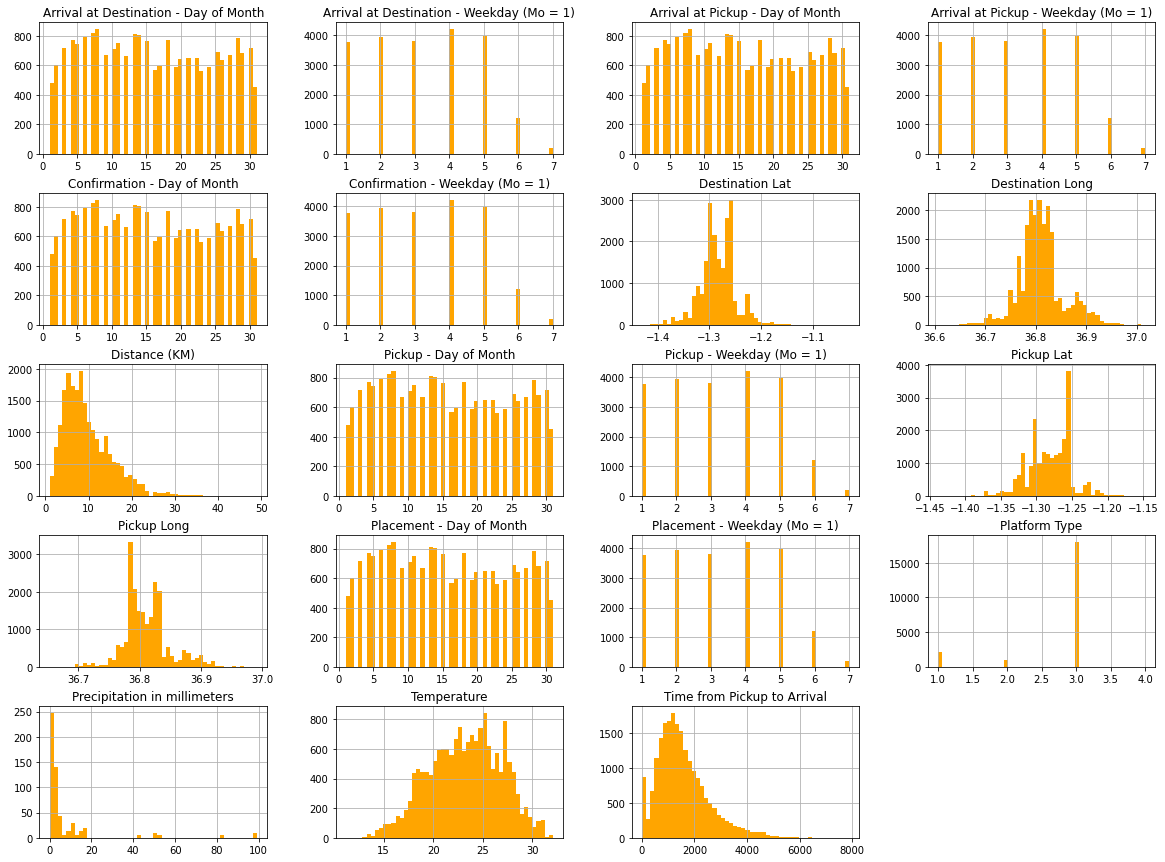

In [0]:
#plotting distributions of all the variables in train
train.hist(bins=50, figsize=(20,15), color = 'orange')
plt.show()

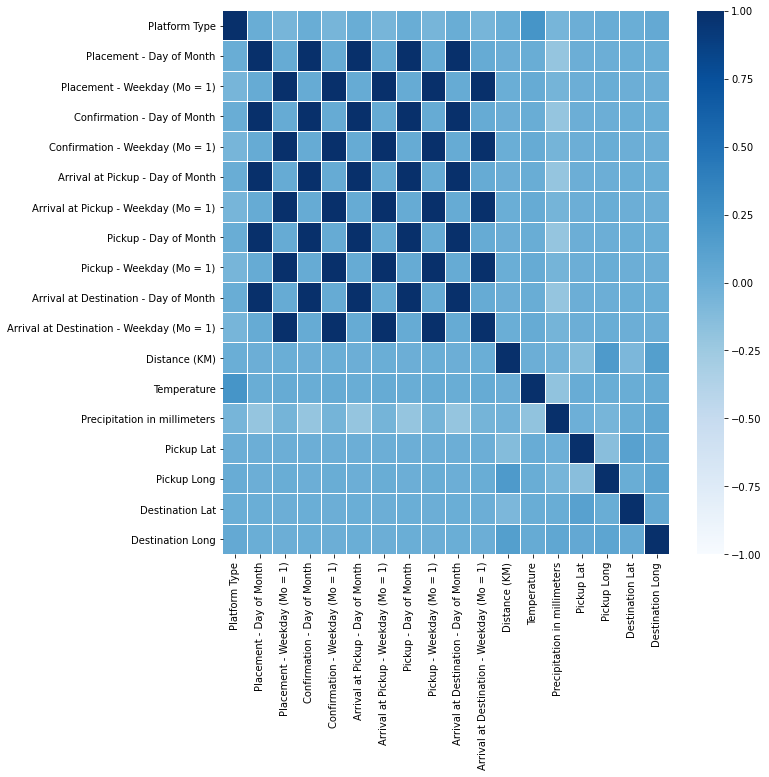

In [0]:
#plotting correlation heat map for predictor variable in train 
train_variables = train.drop(['Time from Pickup to Arrival'], axis =1)
train_kor = train_variables.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train_kor, vmin=-1, vmax=1, cmap='Blues', linewidth=0.1)

In [0]:
#visualising pick-up locations on a street map 
px.scatter_mapbox(train, 
                     lat='Pickup Lat', 
                     lon='Pickup Long',  
                     color = 'Time from Pickup to Arrival',
                     color_continuous_scale = 'Oranges', 
                     mapbox_style = 'open-street-map',
                     title = 'pick up location')

**Test data**

In [0]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
print('test contains')
print('No. of rows:', test.shape[0])
print('No. of columns:', test.shape[1])

test contains
No. of rows: 7068
No. of columns: 25


In [5]:
set(train.columns) - set(test.columns)

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

We must drop the above before moving on

In [6]:
set(test.columns) - set(train.columns)

set()

In [7]:
placement = [col for col in train.columns if ((col[:len('Placement')] == 'Placement') or (col[:len('Confirmation')] == 'Confirmation')) ]
placement

['Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Placement - Time',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Confirmation - Time']

The placement time of the order is irrelevant to the target. The main concern of the problem statement is the period between pickup and arrival. When the order was placed, has no bearing whatsoever in effect to that period. So, we are going to drop everything concerning placement.

Furthermore, 'Confirmation' columns, with the same argument, must be dropped.

###2.4 Data preprocessing
<a id="Data_preprocessing"></a>

In [0]:
xdata = train.drop(columns=['Time from Pickup to Arrival', 'User Id', 'Order No', 
'Arrival at Destination - Day of Month',
'Arrival at Destination - Time',
'Arrival at Destination - Weekday (Mo = 1)'] + placement)
X = xdata.copy() # I want to run this column everytime I want to restart after changes
X = X.merge(riders, how='left', on=['Rider Id']).drop(columns=['Rider Id'])

f_testx = test.merge(riders, how='left', on=['Rider Id']).drop(columns=['User Id', 'Order No', 'Rider Id'] + placement)

In [0]:
y = train['Time from Pickup to Arrival'] # The target

Let's confirm if columns on train are those on test

In [12]:
set(f_testx.columns) == set(X.columns)

True

In [0]:
#Splitting the data into test and train sets  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now things are about to get ugly( or clean, depending on how you look at it...). The below function is a cleaner that prepares the datasets for modelling 

In [0]:
### START FUNCTION
def cleaner(input_df, nullthreshold=0.9, correlation_thresh=0.95, day_of_month_cols=[], day_of_week_cols=[]):
    input_dfc = input_df.copy()
    

    #########################################################################################
    # The Code below drops columns that have null values exceeding threshold and Columns that have ONLY one value
    for col in input_df.columns:
        if (sum(input_df[col].isnull())/len(input_df[col]) > nullthreshold) or (len(input_df[col].unique()) == 1):
            input_dfc.drop(columns=[col], inplace=True) 
            
    #########################################################################################

    #########################################################################################
    #This code converts time given by am and pm into seconds then applies cosine and sine
    def time_to_seconds(input_df):
        input_dfc = input_df.copy()

        from datetime import datetime

        for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

            input_dfc[time_col + '_sin(seconds)'] = \
            input_df[time_col].apply(lambda time: np.sin(
                (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds() \
                * (2.*np.pi/86400) )) # there are 86400 seconds in a day

            input_dfc[time_col + '_cos(seconds)'] = \
            input_df[time_col].apply(lambda time: np.cos(
                (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds() \
                * (2.*np.pi/86400) ))

            input_dfc.drop(columns=[time_col], inplace=True)

        return input_dfc

    input_dfc2 = time_to_seconds(input_dfc)
    #########################################################################################
    
    #########################################################################################
    # This code encodes ['Platform Type', 'Personal or Business']
    
    def one_encoder(input_df, columns):
    
        return pd.get_dummies(input_df, drop_first=True, columns=columns, dtype=float)

    
    input_dfc2 = one_encoder(input_dfc2, ['Platform Type', 'Personal or Business'])
    #########################################################################################
    def cyclic_days(input_df, month_days_cols, weekdays_cols):
        input_dfc = input_df.copy()


        for mday_col in month_days_cols:
            if mday_col in input_dfc.columns:

                input_dfc[mday_col + '_sin(day)'] = input_df[mday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/31))\
                    )

                input_dfc[mday_col + '_cos(day)'] = input_df[mday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/31))\
                    )

                input_dfc.drop(mday_col, inplace=True, axis=1)


        for wday_col in weekdays_cols:
            if wday_col in input_dfc.columns:

                input_dfc[wday_col + '_sin(day)'] = input_df[wday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/7))\
                    )

                input_dfc[wday_col + '_cos(day)'] = input_df[wday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/7))\
                    )

                input_dfc.drop(wday_col, inplace=True, axis=1)
            else:
                continue

        return input_dfc
    
    input_dfc2 = cyclic_days(input_dfc2, day_of_month_cols, day_of_week_cols)     
    #########################################################################################
    # This code will remove one of a pair of variables that are 95% correlated
    def correlation_drop(df, thresh):
        while True:
            corr_matrix = df.corr(method = "spearman").abs()
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
            to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
            if len(to_drop) == 0:
                break
            else:
                df = df.drop(to_drop, axis = 1)
            
        return df
    
    input_dfc2 = correlation_drop(input_dfc2, correlation_thresh)
    #########################################################################################

    print(f"Total of {len([x for x in input_df.columns if x not in input_dfc2])} original columns dropped \n")  
    print(f"Total of {len([x for x in input_dfc2.columns if x not in input_df])} new CLEAN columns formed \n")
    print(f"Dataframe now has {len(input_dfc2.columns)} from {len(input_df.columns)} input columns")
    #print([x for x in input_df.columns if x not in input_dfc2])

    return input_dfc2

### END FUNCTION

Now we apply our ultimate cleaner

In [14]:
day_of_month_cols = [x for x in X.columns if x[-5:] == 'Month']
day_of_week_cols = [x for x in X.columns if x[-(len('(Mo = 1)')):] == '(Mo = 1)']
X_train = cleaner(X_train, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols)

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


In [15]:
X_test = cleaner(X_test, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols)

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


In [16]:
X1 = cleaner(X, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols) # When we want to create a cross validation model

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


In [17]:
#applying cleaner to final test as well
F_test = cleaner(f_testx, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols)

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


###2.5 Modelling 
<a id="Modelling"></a>

In [0]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

###2.6. Model Selection
<a id="Model_selection"></a>

In [0]:
Final decision:
create a df with all the models and the r2 values 
select the one with the best r2 and use it to predict from the testing df
Also check Assess model accuracy in variable selection train 

###2.7 Using the model on test

In [0]:
all transformations to be done on testing df 

In [0]:
Predict y based on model, output a df for competition that has order no, and time from pick-up to arrival 

###2.8 Function to be placed in API  

##**3 Conclusion**
<a id="Conclusion"></a> 

##**4 References and links**
<a id="References_and_links"></a>

Trello board https://trello.com/invite/b/sTrqpPh0/260261e33880d23cf37aa649c1541763/regression-team-2-project-board

Github 

API

Google drive presentation slides https://drive.google.com/drive/folders/17_A2yVWEc7ixWI2BFRkJ5b1x98E31H0r?usp=sharing